In [1]:

import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms
import torch.nn.functional as F
from torchsummary import summary
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import numpy as np



In [2]:
DATA_FOLDER = "../../data"
from torch.utils.data import Dataset
import random


def show_images(image_data, rows=4, cols=4):
    print(f"Number of images: {len(image_data)}")
    sample_idx = random.randint(0,len(image_data))
    # print(training_data[0])
    classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    print(f"Image index: {sample_idx}, label : {classes[image_data[sample_idx][1]]}, image size: {image_data[sample_idx][0].shape}")

    # Showing one image
    img, label = image_data[sample_idx]
    plt.figure(figsize=(2,2))
    plt.title(f"CIFAR-10 Image {sample_idx} - Label: {classes[label]}")
    plt.imshow(img.numpy().transpose((1, 2, 0)))



    figure = plt.figure(figsize=(6, 6))
    for i in range(1, cols * rows + 1):
        sample_idx = random.randint(0,len(image_data))
        img, label = image_data[sample_idx]
        figure.add_subplot(rows, cols, i)
        
        plt.title(classes[label])
        plt.tight_layout()
        plt.axis("off")
        plt.imshow(img.numpy().transpose((1, 2, 0)))
    plt.show()








In [3]:
def get_custom_transforms(only_basic = True):
    if only_basic:
        return transforms.Compose([ transforms.ToTensor(),transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))])
    else:
        
        return transforms.Compose(
            [ transforms.ToTensor(),
             transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616)),
             transforms.RandomRotation((-7.0,7.0), fill=(1,))
            #  transforms.RandomApply([transforms.RandomRotation(degrees=10)],p=0.1)
             #transforms.RandomApply([transforms.RandomCrop(size=(2,2), fill=0)],p=0.1)
            #  transforms.RandomErasing(p=0.1, scale=(0.02,0.1))
            #  transforms.RandomHorizontalFlip(p=0.1)
             ])

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


---->TRAINING data with transform
Number of images: 50000
Image index: 49559, label : plane, image size: torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

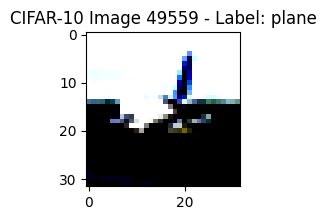

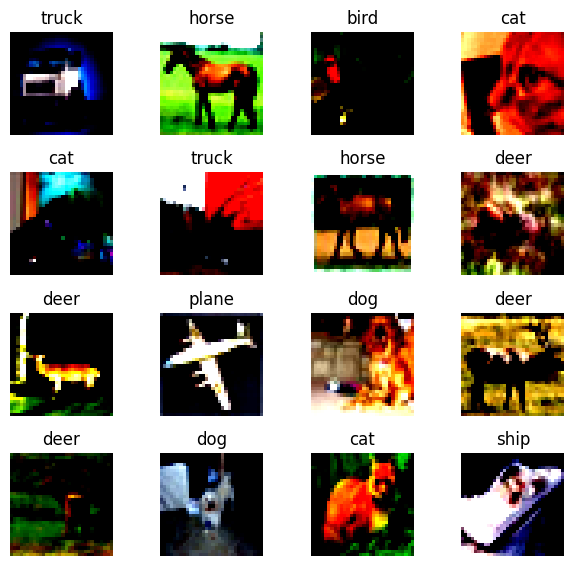

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


---->TEST data with basic transform
Number of images: 10000
Image index: 2258, label : car, image size: torch.Size([3, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

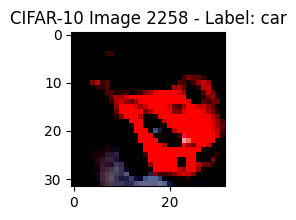

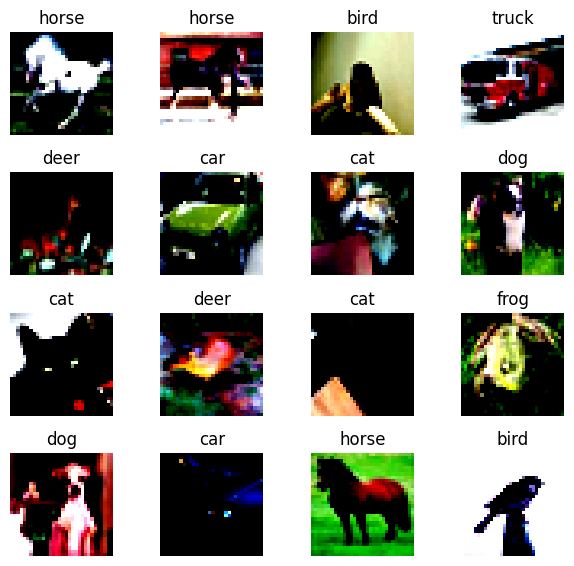

In [4]:

# Download training data from open datasets.

train_dataset = datasets.CIFAR10(
    root=DATA_FOLDER,
    train=True,
    download=True,
    transform=get_custom_transforms(only_basic=True)
)


# Download test data from open datasets.

test_dataset = datasets.CIFAR10(
    root=DATA_FOLDER,
    train=False,
    download=True,
    transform=get_custom_transforms(only_basic=True)
)

img, label = train_dataset[11]

print("---->TRAINING data with transform")
show_images(train_dataset)


print("---->TEST data with basic transform")
show_images(test_dataset)


In [5]:
is_gpu_available = torch.cuda.is_available()
SEED = 1
device = "cpu"
if(is_gpu_available):
    device = "cuda"
    # This ensures that computations involving randomness on the GPU will produce the same results
    # when the seed is the same, even if you run the code multiple times.
    torch.cuda.manual_seed(SEED)

print(f"device: {device}")

device: cuda


In [6]:
BATCH_SIZE = 128

# Create data loaders.
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True)

for data, target in test_dataloader:
#  X would likely be a tensor containing the pixel values of a batch of grayscale images 
# (e.g., shape: (batch_size, 1 channel, 28, 28)).
# y would contain the corresponding labels for each image, indicating the actual digit represented in the image 
# (e.g., a tensor of shape (batch_size,) containing integer values between 0 and 9).
    print(f"Shape of X [Batch, C, H, W]: {data.shape}")
    print(f"Shape of y (label): {target.shape} {target.dtype}")
    break

Shape of X [Batch, C, H, W]: torch.Size([128, 3, 32, 32])
Shape of y (label): torch.Size([128]) torch.int64


In [7]:
def count_parameters(model, input_size=(3,32,32)):
    summary(model=model, input_size=input_size)   
    params = model.state_dict()
    total_parameters =  sum(p.numel() for p in params.values())
    print(f"Total parameters : {total_parameters}")
    return total_parameters

In [17]:
# With regularization . Adding dropout 
# Adding global average pooling and capacity at bottom layer
DROP_OUT = 0.1
class Net2(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=16,kernel_size=3,padding=1, bias=False),            
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(DROP_OUT)
        )#

        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(DROP_OUT)
        )#
        
        self.conv_block3 = nn.Sequential(
            nn.Conv2d(in_channels=32,out_channels=8,kernel_size=1,padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(8),
            nn.Dropout(DROP_OUT)
        )#

        # Max pool
        self.pool1 = nn.Sequential(
            nn.MaxPool2d(kernel_size=2, stride=2)
        )#16

        self.conv_block4 = nn.Sequential(
            nn.Conv2d(in_channels=8,out_channels=16,kernel_size=3,padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(DROP_OUT)
        )#
        
        self.conv_block5 = nn.Sequential(
            nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(DROP_OUT)
        )#

        self.conv_block6 = nn.Sequential(
            nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(DROP_OUT)
        )#

        self.conv_block7 = nn.Sequential(
            nn.Conv2d(in_channels=64,out_channels=16,kernel_size=1,padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(DROP_OUT)
        )#


        self.pool2 = nn.Sequential(
            nn.MaxPool2d(kernel_size=2, stride=2)
        )#8

        self.conv_block8 = nn.Sequential(
            nn.Conv2d(in_channels=16,out_channels=16,kernel_size=3,padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(DROP_OUT)
        )#8

        self.conv_block9 = nn.Sequential(
            nn.Conv2d(in_channels=16,out_channels=16,kernel_size=3,padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(DROP_OUT)
        )#8


        self.conv_block10 = nn.Sequential(
            nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(DROP_OUT)
        )#4

        # Output block

        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=4)
        )


        self.conv_block11 = nn.Sequential(
            nn.Conv2d(in_channels=32,out_channels=10,kernel_size=1,padding=0, bias=False)
        )



    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.conv_block3(x) 
        
        x = self.pool1(x)
              
        x = self.conv_block4(x)
        x = self.conv_block5(x)
        x = self.conv_block6(x)
        x = self.conv_block7(x)

        x = self.pool2(x)

        x = self.conv_block8(x)
        x = self.conv_block9(x)
        x = self.conv_block10(x)
        
        x = self.gap(x)
        x = self.conv_block11(x)
        
        x = x.view(-1,10)
       
        return F.log_softmax(x, dim=1)


In [18]:
def get_model_instance(index=0) -> nn.Module:
    if(index <= 2 ):
        return Net2().to(device=device)


In [19]:
TARGET_PARAMETER_COUNT = 50000

model = get_model_instance(index=2)

actual_parameter_count = count_parameters(model,(3,32,32))
IS_OK = False
if(actual_parameter_count <= TARGET_PARAMETER_COUNT):    
    IS_OK = True

print(f"Parameters criteria IS_OK: {IS_OK}")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
              ReLU-6           [-1, 32, 32, 32]               0
       BatchNorm2d-7           [-1, 32, 32, 32]              64
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9            [-1, 8, 32, 32]             256
             ReLU-10            [-1, 8, 32, 32]               0
      BatchNorm2d-11            [-1, 8, 32, 32]              16
          Dropout-12            [-1, 8, 32, 32]               0
        MaxPool2d-13            [-1, 8, 16, 16]               0
           Conv2d-14           [-1, 16,

In [20]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

def GetCorrectPredCount(pPrediction, pLabels):
  return pPrediction.argmax(dim=1).eq(pLabels).sum().item()

In [21]:
def train_loop(dataloader, model, loss_fn, optimizer):

    model.train()
    pbar = tqdm(dataloader)
    
    train_loss = 0
    correct = 0
    processed = 0

    for batch_id, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        # Compute prediction and loss

        optimizer.zero_grad()
        pred = model(data)
        loss = loss_fn(pred, target)
        train_loss+=loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()
        
        correct += GetCorrectPredCount(pred, target)
        processed += len(data)
        pbar.set_description(desc= f'Train: Loss={loss.item():0.4f} Batch_id={batch_id} Accuracy={100*correct/processed:0.2f}')

    train_acc.append(100*correct/processed)
    train_losses.append(train_loss/len(dataloader))


In [22]:
def test_loop(dataloader, model, loss_fn, capture_results = False):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for data, target in dataloader:
            data, target = data.to(device), target.to(device)
            pred = model(data)
            test_loss += loss_fn(pred, target).item()
            correct += GetCorrectPredCount(pred, target)

    test_loss /= num_batches
    test_acc.append(100. * correct / len(dataloader.dataset))
    test_losses.append(test_loss)

    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(dataloader.dataset),
        100. * correct / len(dataloader.dataset)))


In [24]:
LEARNING_RATE = 0.02
EPOCHS = 10
MOMENTUM = 0.9


loss_fn = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM, weight_decay=0)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=6, gamma=0.4, verbose=True)


for t in range(EPOCHS):
    print(f"Epoch {t+1}")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    capture_results = False
    if(t == EPOCHS-1):
        capture_results = True
    
    test_loop(test_dataloader, model, loss_fn, capture_results=capture_results)
    scheduler.step()
print("Done!")

Epoch 1


Train: Loss=1.3620 Batch_id=390 Accuracy=58.37: 100%|██████████| 391/391 [00:21<00:00, 18.44it/s]


Test set: Average loss: 1.1656, Accuracy: 5821/10000 (58.21%)

Epoch 2


Train: Loss=0.9389 Batch_id=390 Accuracy=63.45: 100%|██████████| 391/391 [00:21<00:00, 18.39it/s]


Test set: Average loss: 1.0400, Accuracy: 6255/10000 (62.55%)

Epoch 3


Train: Loss=0.6873 Batch_id=390 Accuracy=66.81: 100%|██████████| 391/391 [00:23<00:00, 16.90it/s]


Test set: Average loss: 0.9585, Accuracy: 6603/10000 (66.03%)

Epoch 4


Train: Loss=0.7507 Batch_id=390 Accuracy=69.29: 100%|██████████| 391/391 [00:24<00:00, 16.19it/s]


Test set: Average loss: 0.9598, Accuracy: 6608/10000 (66.08%)

Epoch 5


Train: Loss=0.7129 Batch_id=390 Accuracy=70.44: 100%|██████████| 391/391 [00:21<00:00, 17.81it/s]


Test set: Average loss: 0.8675, Accuracy: 6974/10000 (69.74%)

Epoch 6


Train: Loss=0.4418 Batch_id=390 Accuracy=72.32: 100%|██████████| 391/391 [00:22<00:00, 17.23it/s]


Test set: Average loss: 0.8505, Accuracy: 7005/10000 (70.05%)

Epoch 7


Train: Loss=0.7325 Batch_id=390 Accuracy=74.29: 100%|██████████| 391/391 [00:22<00:00, 17.22it/s]


Test set: Average loss: 0.7291, Accuracy: 7419/10000 (74.19%)

Epoch 8


Train: Loss=0.9142 Batch_id=390 Accuracy=74.85: 100%|██████████| 391/391 [00:23<00:00, 16.95it/s]


Test set: Average loss: 0.7280, Accuracy: 7436/10000 (74.36%)

Epoch 9


Train: Loss=0.7004 Batch_id=390 Accuracy=75.35: 100%|██████████| 391/391 [00:24<00:00, 15.76it/s]


Test set: Average loss: 0.7319, Accuracy: 7449/10000 (74.49%)

Epoch 10


Train: Loss=0.5806 Batch_id=390 Accuracy=75.67: 100%|██████████| 391/391 [00:22<00:00, 17.63it/s]


Test set: Average loss: 0.7383, Accuracy: 7420/10000 (74.20%)

Done!
